# Tensorflow Various trials + MNIST

In [1]:
import tensorflow as tf

In [2]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

In [3]:

matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.], [2.]])
product = tf.matmul(matrix1, matrix2)

with tf.device("/gpu:2"):
    result = sess.run(product)
    print result
sess.close()

[[ 12.]]


In [ ]:
sess = tf.InteractiveSession()


x = tf.Variable([1.0, 2.0])
a = tf.constant([3.0, 3.0])

x.initializer.run()

# Add an op to subtract 'a' from 'x'.  Run it and print the result
sub = tf.sub(x, a)
print(sub.eval())
# ==> [-2. -1.]

# Close the Session when we're done.
sess.close()

In [9]:
state = tf.Variable(0, name='counter')
one = tf.constant(1)
new_value = tf.add(state, one)
reassigned_value = tf.assign(state, new_value)
init_op = tf.global_variables_initializer()

with tf.Session() as sess:
    with tf.device("/gpu:2"):
        sess.run(init_op)
        print sess.run(state)
        for i in range(10):
            sess.run(reassigned_value)
            print sess.run(state)

0
1
2
3
4
5
6
7
8
9
10


## MNIST Beginners

In [ ]:
from collections import namedtuple
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.examples.tutorials.mnist import mnist
FLAGS = namedtuple('FLAGS', ['input_data_dir', 'log_dir', 'fake_data', 
                             'batch_size', 'learning_rate', 'max_steps', 
                             'hidden1','hidden2'])
FLAGS.input_data_dir = "/mnt/data2/shalaby/tensorflow/mnist/input_data"
FLAGS.logs_dir = "/mnt/data2/shalaby/tensorflow/mnist/logs/beginner"
FLAGS.batch_size = 100
FLAGS.hidden1 = 128
FLAGS.hidden2 = 32
FLAGS.max_steps = 2000
FLAGS.learning_rate = 0.01
FLAGS.num_classes = 10
FLAGS.fake_data = False
data_sets = input_data.read_data_sets(FLAGS.input_data_dir, fake_data=FLAGS.fake_data, one_hot=True)
#W = tf.Variable(initial_value=tf.zeros((mnist.IMAGE_PIXELS, FLAGS.num_classes)), dtype='float32')
W = tf.Variable(initial_value=np.zeros((mnist.IMAGE_PIXELS, FLAGS.num_classes)), dtype='float32')
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [1]:
from collections import namedtuple
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.examples.tutorials.mnist import mnist

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.examples.tutorials.mnist import mnist

In [3]:
FLAGS = namedtuple('FLAGS', ['input_data_dir', 'log_dir', 'fake_data', 
                             'batch_size', 'learning_rate', 'max_steps', 
                             'hidden1','hidden2'])

In [12]:
FLAGS.input_data_dir = "/mnt/data2/shalaby/tensorflow/mnist/input_data"
FLAGS.logs_dir = "/mnt/data2/shalaby/tensorflow/mnist/logs/beginner"
FLAGS.batch_size = 100
FLAGS.hidden1 = 128
FLAGS.hidden2 = 32
FLAGS.max_steps = 2000
FLAGS.learning_rate = 0.01
FLAGS.num_classes = 10
FLAGS.fake_data = False

In [5]:
data_sets = input_data.read_data_sets(FLAGS.input_data_dir, fake_data=FLAGS.fake_data, one_hot=True)

Extracting /mnt/data2/shalaby/tensorflow/mnist/input_data/train-images-idx3-ubyte.gz
Extracting /mnt/data2/shalaby/tensorflow/mnist/input_data/train-labels-idx1-ubyte.gz
Extracting /mnt/data2/shalaby/tensorflow/mnist/input_data/t10k-images-idx3-ubyte.gz
Extracting /mnt/data2/shalaby/tensorflow/mnist/input_data/t10k-labels-idx1-ubyte.gz


In [6]:
x = tf.placeholder(dtype='float32', shape=(None, mnist.IMAGE_PIXELS))
W = tf.Variable(initial_value=tf.zeros((mnist.IMAGE_PIXELS, FLAGS.num_classes)), dtype='float32')
b = tf.Variable(initial_value=tf.zeros(10), dtype='float32')
z = tf.add(tf.matmul(x,W), b)
y = tf.nn.softmax(z)
t = tf.placeholder(dtype='float32', shape=(None, FLAGS.num_classes))

In [7]:
# the tf.reduce_mean is for averaging it across the mini-batch. Cross entropy itself has no mean, just sum
cross_entropy = tf.reduce_mean(-tf.reduce_sum(t * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [8]:
init = tf.global_variables_initializer()

In [9]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session()
#sess = tf.Session(config=config)
#sess.run(init)

In [10]:
sess.run(init)

In [18]:
import matplotlib.pylab as plt

In [ ]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(t,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [52]:
upd = tf.assign(W, tf.zeros((mnist.IMAGE_PIXELS, FLAGS.num_classes)))

In [64]:
sess.run(upd)

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [39]:
sess.run(tf.reduce_sum(W))

0.0

<IPython.core.display.Javascript object>


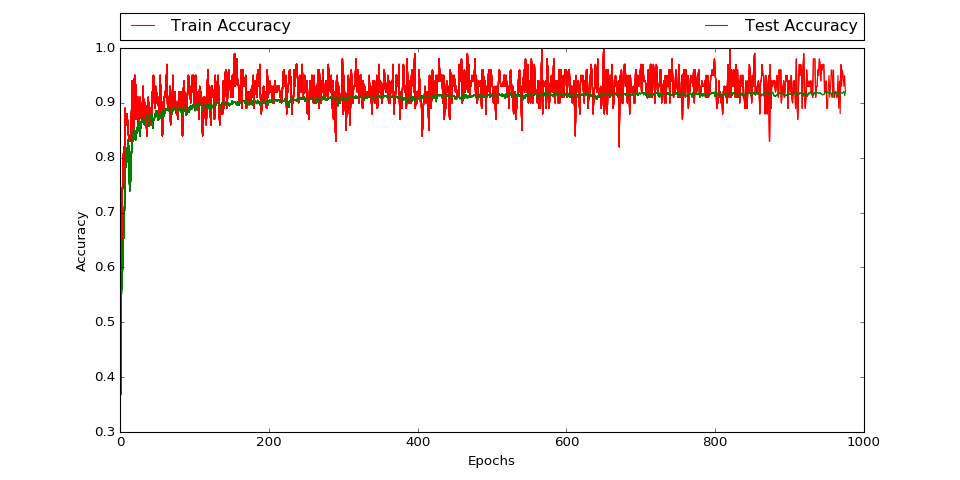

CPU times: user 27.5 s, sys: 8.17 s, total: 35.7 s
Wall time: 22.4 s


In [65]:
%%time
%matplotlib notebook
fig = plt.figure(figsize=(12,6), dpi=80)
ax = plt.subplot(111)
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")
train_accuracies = []
test_accuracies = []
for i in range(1000):
    batch_xs, batch_ys = data_sets.train.next_batch(100)
    sess.run(train_step, feed_dict={x:batch_xs, t:batch_ys})
    train_accuracy_value = sess.run(accuracy, feed_dict={x:batch_xs, t: batch_ys})
    test_accuracy_value = sess.run(accuracy, feed_dict={x:data_sets.test.images, t: data_sets.test.labels})
    train_accuracies.append(train_accuracy_value)
    test_accuracies.append(test_accuracy_value)
    # those graph updates really decrease the speed of execution
    if i%25 ==0:
        train_line, = ax.plot(range(i+1), train_accuracies, 'r-', label='Train Accuracy')
        test_line, = ax.plot(range(i+1), test_accuracies, 'g-', label='Test Accuracy')
        ax.legend(handles=[train_line, test_line],
                      bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
        fig.canvas.draw()

## MNIST TensorFlow Mechanics 101
https://www.tensorflow.org/versions/r0.12/tutorials/mnist/tf/index.html

In [72]:
import math
import time

In [129]:
FLAGS.input_data_dir = "/mnt/data2/shalaby/tensorflow/mnist/input_data"
FLAGS.logs_dir = "/mnt/data2/shalaby/tensorflow/mnist/logs/tf-mechanics"
FLAGS.batch_size = 100
FLAGS.hidden1 = 128
FLAGS.hidden2 = 32
FLAGS.max_steps = 2000
FLAGS.learning_rate = 0.01
FLAGS.num_classes = 10
FLAGS.fake_data = False

In [130]:
data_sets = input_data.read_data_sets(FLAGS.input_data_dir, fake_data=FLAGS.fake_data)

Extracting /mnt/data2/shalaby/tensorflow/mnist/input_data/train-images-idx3-ubyte.gz
Extracting /mnt/data2/shalaby/tensorflow/mnist/input_data/train-labels-idx1-ubyte.gz
Extracting /mnt/data2/shalaby/tensorflow/mnist/input_data/t10k-images-idx3-ubyte.gz
Extracting /mnt/data2/shalaby/tensorflow/mnist/input_data/t10k-labels-idx1-ubyte.gz


In [131]:
images_placeholder = tf.placeholder(tf.float32, shape=(FLAGS.batch_size, mnist.IMAGE_PIXELS))
labels_placeholder = tf.placeholder(tf.int32, shape=(FLAGS.batch_size))

<b>Inference</b>

In [132]:
# Hidden 1
with tf.name_scope('hidden1'):
    # near 0 weights
    weights = tf.Variable(initial_value=tf.truncated_normal([mnist.IMAGE_PIXELS, FLAGS.hidden1], 
                                                            stddev=1.0/math.sqrt(float(mnist.IMAGE_PIXELS))),
                         name='weights')
    biases = tf.Variable(initial_value=tf.zeros([FLAGS.hidden1]), name='biases')
    z = tf.add(tf.matmul(images_placeholder, weights), biases)
    hidden1 = tf.nn.relu(z)

# Hidden 1
with tf.name_scope('hidden2'):
    # near 0 weights
    weights = tf.Variable(initial_value=tf.truncated_normal([FLAGS.hidden1, FLAGS.hidden2], 
                                                            stddev=1.0/math.sqrt(float(FLAGS.hidden1))),
                         name='weights')
    biases = tf.Variable(initial_value=tf.zeros(FLAGS.hidden2), name='biases')
    z = tf.add(tf.matmul(hidden1, weights), biases)
    hidden2 = tf.nn.relu(z)
    
# Linear
with tf.name_scope('linear'):
    weights = tf.Variable(initial_value=tf.truncated_normal([FLAGS.hidden2, FLAGS.num_classes], 
                                                            stddev=1.0/math.sqrt(float(FLAGS.hidden2))),
                         name='weights')
    biases = tf.Variable(initial_value=tf.zeros(FLAGS.num_classes), name='biases')
    logits = tf.add(tf.matmul(hidden2, weights), biases)

<b>Loss</b>

In [133]:
labels = tf.to_int64(labels_placeholder)
cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels, name='xentropy')
loss = tf.reduce_mean(cross_entropy, name='xentropy_mean')

<b>Training</b>

In [134]:
optimizer = tf.train.GradientDescentOptimizer(FLAGS.learning_rate)
global_step = tf.Variable(0, name='global_step', trainable=False)
train_step = optimizer.minimize(loss, global_step=global_step)

<b>Evaluation</b>

In [135]:
correct = tf.nn.in_top_k(logits, labels, 1)
# Return the number of true entries.
eval_correct = tf.reduce_sum(tf.cast(correct, tf.int32))

<b>Actual Loop</b>

In [136]:
init = tf.global_variables_initializer()

In [137]:
sess.run(init)

In [138]:
def fill_feed_dict(data_set, images_pl, labels_pl):
    """Fills the feed_dict for training the given step.
    A feed_dict takes the form of:
    feed_dict = {
      <placeholder>: <tensor of values to be passed for placeholder>,
      ....
    }
    Args:
    data_set: The set of images and labels, from input_data.read_data_sets()
    images_pl: The images placeholder, from placeholder_inputs().
    labels_pl: The labels placeholder, from placeholder_inputs().
    Returns:
    feed_dict: The feed dictionary mapping from placeholders to values.
    """
    # Create the feed_dict for the placeholders filled with the next
    # `batch size` examples.
    images_feed, labels_feed = data_set.next_batch(FLAGS.batch_size,
                                                 FLAGS.fake_data)
    feed_dict = {
      images_pl: images_feed,
      labels_pl: labels_feed
    }
    return feed_dict

In [141]:
def do_eval(sess, eval_correct, images_placeholder, labels_placeholder, data_set):
    true_count = 0  # Counts the number of correct predictions.
    steps_per_epoch = data_set.num_examples // FLAGS.batch_size
    num_examples = steps_per_epoch * FLAGS.batch_size
    for step in xrange(steps_per_epoch):
        feed_dict = fill_feed_dict(data_set,
                                   images_placeholder,
                                   labels_placeholder)
        true_count += sess.run(eval_correct, feed_dict=feed_dict)
    precision = float(true_count) / num_examples
    print('  Num examples: %d  Num correct: %d  Precision @ 1: %0.04f' %
        (num_examples, true_count, precision))

In [142]:
for step in xrange(FLAGS.max_steps):
    start_time = time.time()
    
    feed_dict = fill_feed_dict(data_sets.train,
                                 images_placeholder,
                                 labels_placeholder)
    
    _, loss_value = sess.run([train_step, loss],
                             feed_dict=feed_dict)
    
    duration = time.time() - start_time
    
    if step % 100 == 0:
        print 'Step %d: loss = %.2f (%.3f sec)' % (step, loss_value, duration)
        print('Training Data Eval:')
        do_eval(sess,
                eval_correct,
                images_placeholder,
                labels_placeholder,
                data_sets.train)
        # Evaluate against the validation set.
        print('Validation Data Eval:')
        do_eval(sess,
                eval_correct,
                images_placeholder,
                labels_placeholder,
                data_sets.validation)
        # Evaluate against the test set.
        print('Test Data Eval:')
        do_eval(sess,
                eval_correct,
                images_placeholder,
                labels_placeholder,
                data_sets.test)
        

Step 0: loss = 0.56 (0.005 sec)
Training Data Eval:
  Num examples: 55000  Num correct: 49187  Precision @ 1: 0.8943
Validation Data Eval:
  Num examples: 5000  Num correct: 4496  Precision @ 1: 0.8992
Test Data Eval:
  Num examples: 10000  Num correct: 8984  Precision @ 1: 0.8984
Step 100: loss = 0.29 (0.001 sec)
Training Data Eval:
  Num examples: 55000  Num correct: 49365  Precision @ 1: 0.8975
Validation Data Eval:
  Num examples: 5000  Num correct: 4505  Precision @ 1: 0.9010
Test Data Eval:
  Num examples: 10000  Num correct: 9006  Precision @ 1: 0.9006
Step 200: loss = 0.35 (0.078 sec)
Training Data Eval:
  Num examples: 55000  Num correct: 49363  Precision @ 1: 0.8975
Validation Data Eval:
  Num examples: 5000  Num correct: 4510  Precision @ 1: 0.9020
Test Data Eval:
  Num examples: 10000  Num correct: 9017  Precision @ 1: 0.9017
Step 300: loss = 0.36 (0.001 sec)
Training Data Eval:
  Num examples: 55000  Num correct: 49397  Precision @ 1: 0.8981
Validation Data Eval:
  Num exa

In [143]:
sess.close()